In [165]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv',encoding='latin-1')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [167]:
df.columns=df.columns.str.strip()

def changes_names(column_name):
    if '' in column_name:
        return column_name.replace(' ','_')
    return column_name
    
df.columns=df.columns.map(changes_names)


In [168]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [127]:
print(f'Origina Dataframe Shape {df.shape}')

Origina Dataframe Shape (500, 9)


In [169]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
features_with_na


for features in features_with_na:
    print(features,np.round(df[features].isnull().mean() *100 ,4),f'% Missing Values {name}')



In [170]:
df.dropna(inplace=True)
df.drop(columns='Serial_No.',inplace=True)

In [130]:
category_cols = ['University_Rating', 'SOP', 'LOR', 'Research'] # Values are fixed in the column 
num_cols = ['GRE_Score', 'TOEFL_Score', 'CGPA'] # Continous variable
target = 'Chance_of_Admit'  # Actual Prediction

# Univariate Analysis

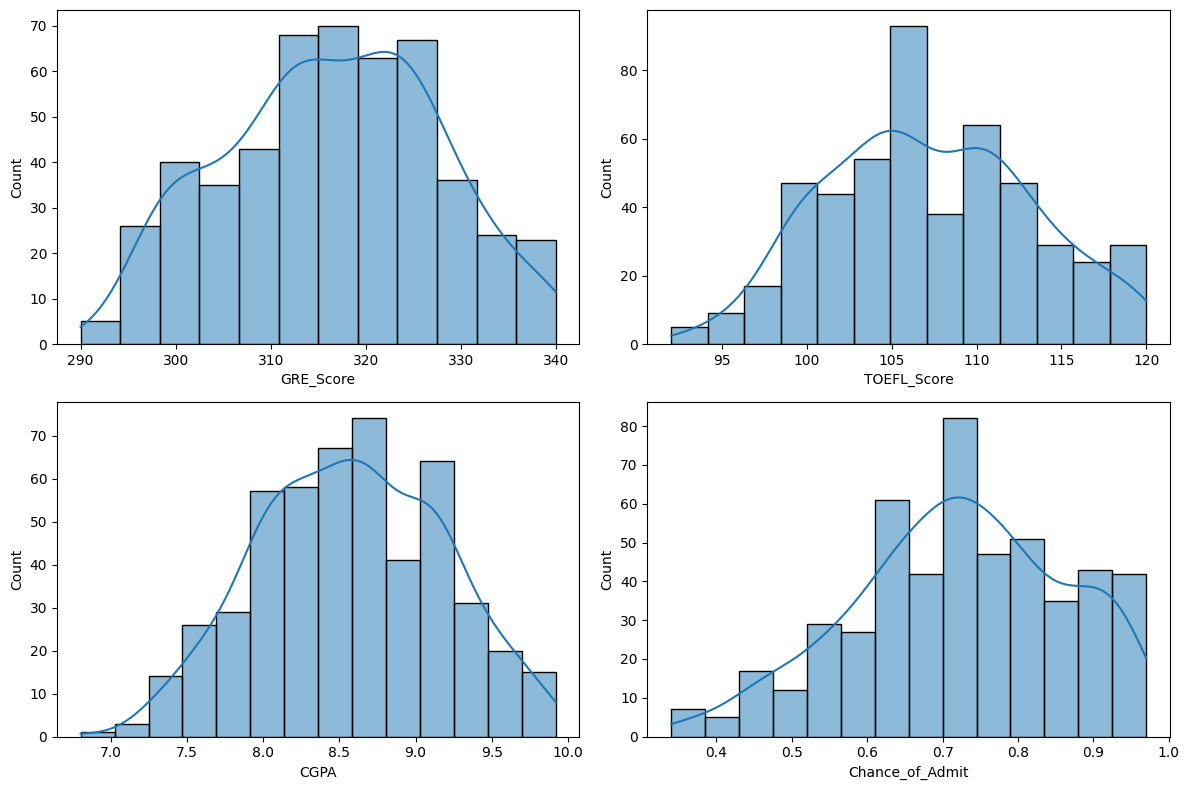

In [90]:
#Numerical values

rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))


for i, ax in enumerate(axs.flat):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=ax)

sns.histplot(df[target], kde=True, ax=axs[1,1])
plt.tight_layout()
plt.show()

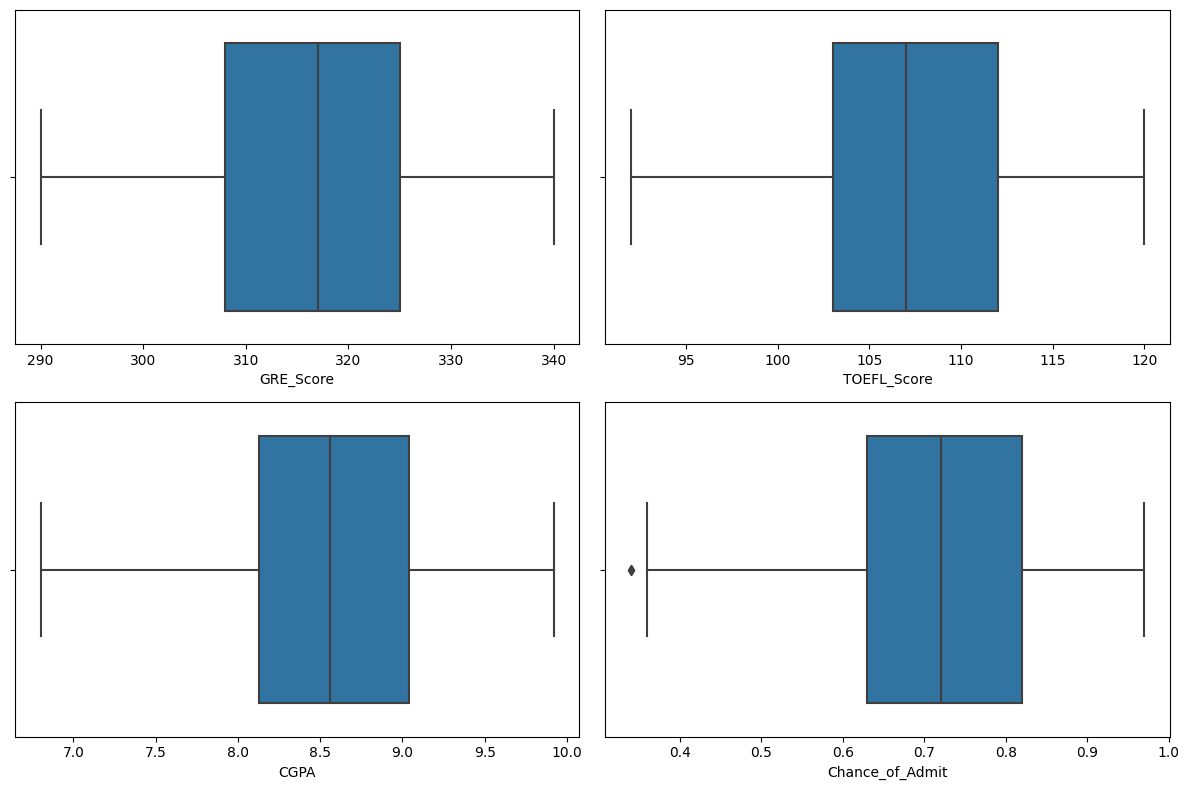

In [91]:
#Outliers in numerical variables

rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))


for i, ax in enumerate(axs.flat):
    if i<len(num_cols):
        sns.boxplot(x=df[num_cols[i]], data=df, ax=ax)

sns.boxplot(x=df[target], data=df, ax=axs[1,1])

plt.tight_layout()
plt.show()

No outliers

In [92]:
# unique values in categorical variables
for col in category_cols:
    print(f" {col}   {df[col].nunique()} ")

 University_Rating   5 
 SOP   9 
 LOR   9 
 Research   2 


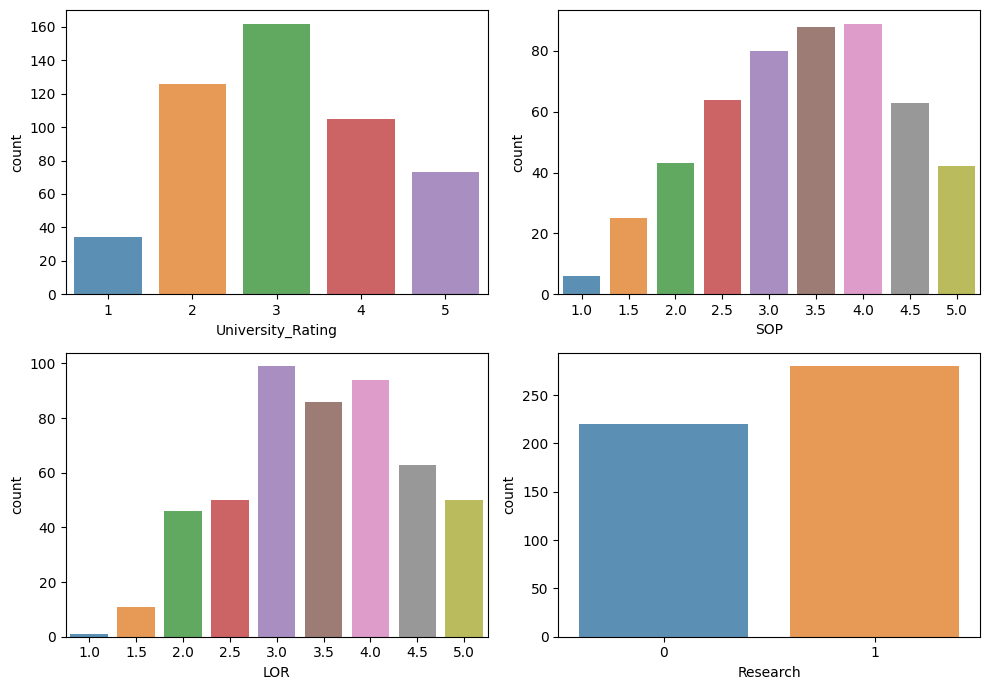

In [93]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

for i, ax in enumerate(axs.flat):
    sns.countplot(x=category_cols[i], data=df, ax=ax, alpha=0.8)

plt.tight_layout()
plt.show()

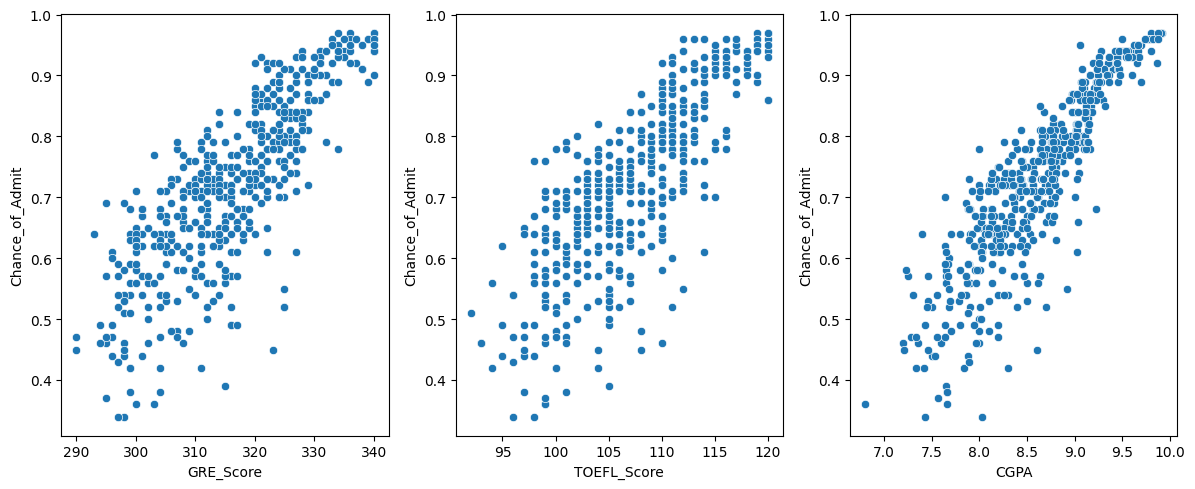

In [94]:
####Bivariate analysis



# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, len(num_cols), figsize=(12, 5))

for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, y=target, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

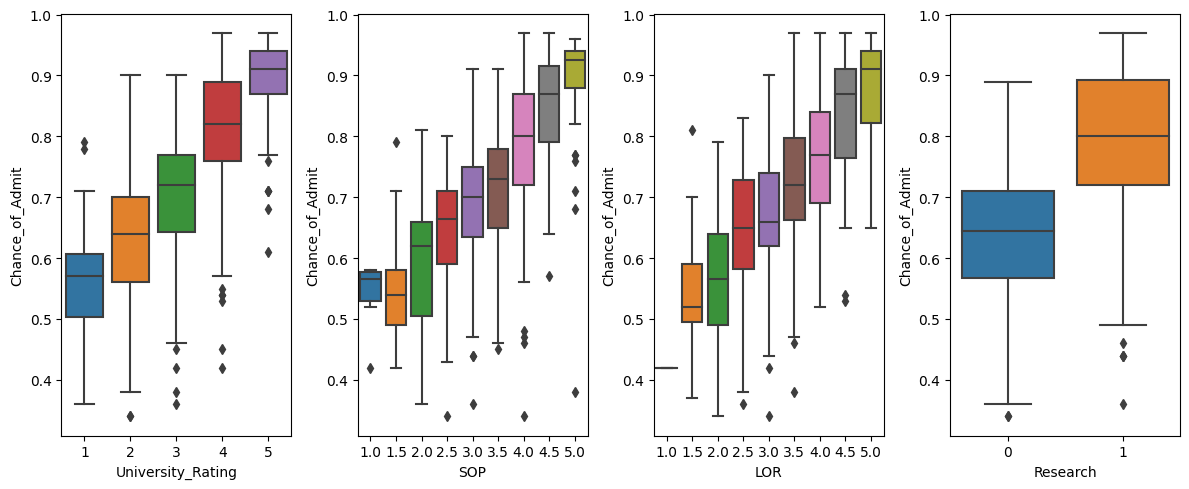

In [95]:
# check relation bw categorical variables & target variable
fig, axs = plt.subplots(1, len(category_cols), figsize=(12, 5))

for i, col in enumerate(category_cols):
    sns.boxplot(x=col, y=target, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

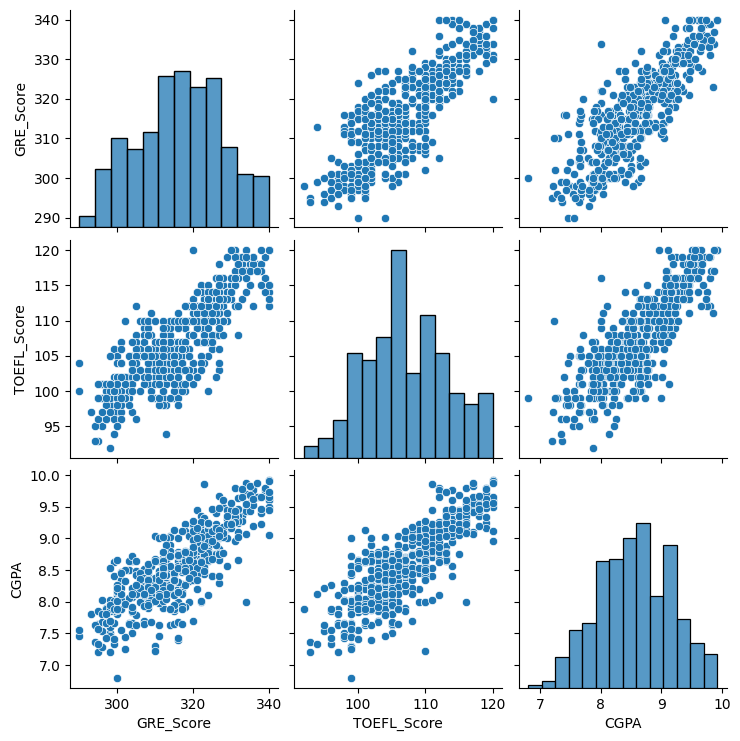

In [96]:
####Multivariate Analysis

sns.pairplot(df[num_cols])
plt.show()

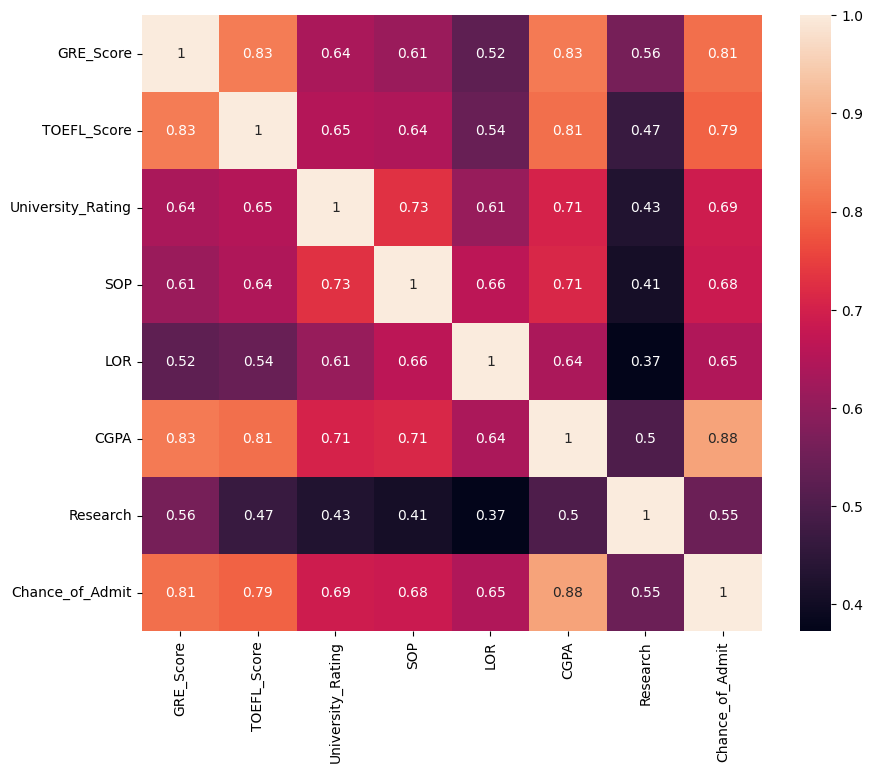

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [171]:
# check for duplicates
df.duplicated().sum()


0

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [173]:
y = df[target]
X=df.drop(columns=[target])
X

GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495        332          108                  5  4.5  4.0  9.02         1
496        337          117                  5  5.0  5.0  9.87         1
497        330          120                  5  4.5  5.0  9.56         1
498        312          103                  4  4.0  5.0  8.43         0
499        327          113                  4  4.5  4.5  9.04         0

[500 rows x 7 columns]

In [174]:
scaling = StandardScaler()
X = scaling.fit_transform(X)
X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(350, 7) (350,)
(150, 7) (150,)


In [176]:
# Add a constant to the independent variables
check_train = sm.add_constant(X_train)
check_test = sm.add_constant(X_test)

# Fit the linear regression model using OLS
model123 = sm.OLS(y_train, check_train).fit()

# Print the summary of the model
print(model123.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.1
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          1.27e-123
Time:                        17:29:21   Log-Likelihood:                 500.20
No. Observations:                 350   AIC:                            -984.4
Df Residuals:                     342   BIC:                            -953.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.003    230.864      0.0

In [177]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)
        
    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [179]:
def train_models(X_train, y_train, X_test, y_test, cols, models):
    results = []
    for model_info in models:
        model_name = model_info[0]
        model_class = model_info[1]
        alpha = None
        if len(model_info) > 2:
            alpha = model_info[2]
        
        model = model_class(alpha=alpha) if alpha is not None else model_class()
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        p = X_train.shape[1]
        train_res = get_metrics(y_train, y_pred_train, p)
        test_res = get_metrics(y_test, y_pred_test, p)
        
        coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
        
        results.append({
            "model_name": model_name,
            "train_metrics": train_res,
            "test_metrics": test_res,
            "intercept": model.intercept_,
            "coefficients": coef_df
        })
        
    return results

models = [
    ("linear", LinearRegression),
    ("ridge", Ridge, 1.0),
    ("lasso", Lasso, 0.001)
]

results = train_models(X_train, y_train, X_test, y_test, df.columns[:-1], models)

for result in results:
    print("\n" + "-"*50)
    print(f" {result['model_name'].title()} Regression Model ")
    print("-"*50)
    print(f"Train Metrics: {result['train_metrics']}")
    print(f"Test Metrics: {result['test_metrics']}")
    print(f"Intercept: {result['intercept']}")
    print(result['coefficients'])


--------------------------------------------------
 Linear Regression Model 
--------------------------------------------------
Train Metrics: {'mean_absolute_error': 0.04, 'rmse': 0.06, 'r2_score': 0.82, 'adj_r2': 0.82}
Test Metrics: {'mean_absolute_error': 0.04, 'rmse': 0.06, 'r2_score': 0.82, 'adj_r2': 0.81}
Intercept: 0.724978121476996
              Column      Coef
0          GRE_Score  0.018657
1        TOEFL_Score  0.023176
2  University_Rating  0.011565
3                SOP -0.000999
4                LOR  0.012497
5               CGPA  0.064671
6           Research  0.013968

--------------------------------------------------
 Ridge Regression Model 
--------------------------------------------------
Train Metrics: {'mean_absolute_error': 0.04, 'rmse': 0.06, 'r2_score': 0.82, 'adj_r2': 0.82}
Test Metrics: {'mean_absolute_error': 0.04, 'rmse': 0.06, 'r2_score': 0.82, 'adj_r2': 0.81}
Intercept: 0.7249823645841696
              Column      Coef
0          GRE_Score  0.018902
1   

In [186]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data



In [187]:
res = vif(df.iloc[:,:-1])
res

feature          VIF
0          GRE_Score  1308.061089
1        TOEFL_Score  1215.951898
2  University_Rating    20.933361
3                SOP    35.265006
4                LOR    30.911476
5               CGPA   950.817985
6           Research     2.869493

In [188]:
res = vif(df.iloc[:, 1:-1])
res

feature         VIF
0        TOEFL_Score  639.741892
1  University_Rating   19.884298
2                SOP   33.733613
3                LOR   30.631503
4               CGPA  728.778312
5           Research    2.863301

In [189]:


# # drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res



feature        VIF
0  University_Rating  19.777410
1                SOP  33.625178
2                LOR  30.356252
3               CGPA  25.101796
4           Research   2.842227

In [190]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

feature        VIF
0  University_Rating  15.140770
1                LOR  26.918495
2               CGPA  22.369655
3           Research   2.819171

In [191]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR'], axis=1)
res = vif(newdf)
res

feature        VIF
0  University_Rating  12.498400
1               CGPA  11.040746
2           Research   2.783179

In [192]:
# drop the University Rating
newdf = newdf.drop(columns=['University_Rating'])
res = vif(newdf)
res


feature       VIF
0      CGPA  2.455008
1  Research  2.455008

In [193]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [194]:
models = [
    ("linear", LinearRegression),
    ("ridge", Ridge, 1.0),
    ("lasso", Lasso, 0.001)
]

results = train_models(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], models)

for result in results:
    print("\n" + "-"*50)
    print(f" {result['model_name'].title()} Regression Model ")
    print("-"*50)
    print(f"Train Metrics: {result['train_metrics']}")
    print(f"Test Metrics: {result['test_metrics']}")
    print(f"Intercept: {result['intercept']}")
    print(result['coefficients'])


--------------------------------------------------
 Linear Regression Model 
--------------------------------------------------
Train Metrics: {'mean_absolute_error': 0.05, 'rmse': 0.06, 'r2_score': 0.78, 'adj_r2': 0.78}
Test Metrics: {'mean_absolute_error': 0.05, 'rmse': 0.07, 'r2_score': 0.81, 'adj_r2': 0.81}
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205

--------------------------------------------------
 Ridge Regression Model 
--------------------------------------------------
Train Metrics: {'mean_absolute_error': 0.05, 'rmse': 0.06, 'r2_score': 0.78, 'adj_r2': 0.78}
Test Metrics: {'mean_absolute_error': 0.05, 'rmse': 0.07, 'r2_score': 0.81, 'adj_r2': 0.81}
Intercept: 0.7247830300095277
     Column      Coef
0      CGPA  0.111630
1  Research  0.020362

--------------------------------------------------
 Lasso Regression Model 
--------------------------------------------------
Train Metrics: {'mean_absolute_error': 0.05, 'rmse': 

After removing multicollinear features only 2 are enough to gave the accurate results

RMSE is almost zero

Independent feature is  linearly dependent on the target variables

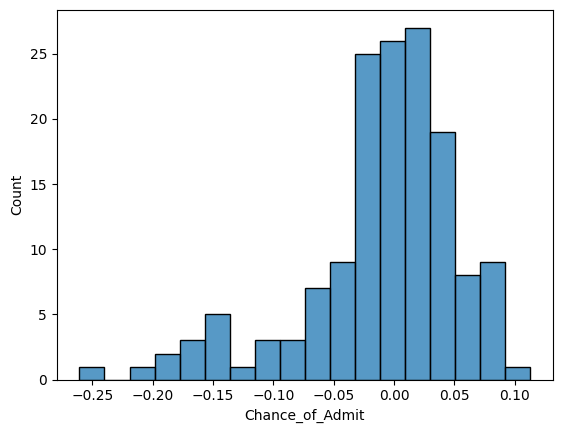

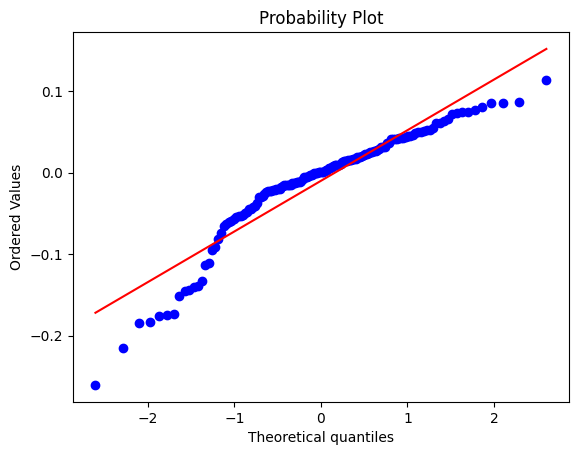

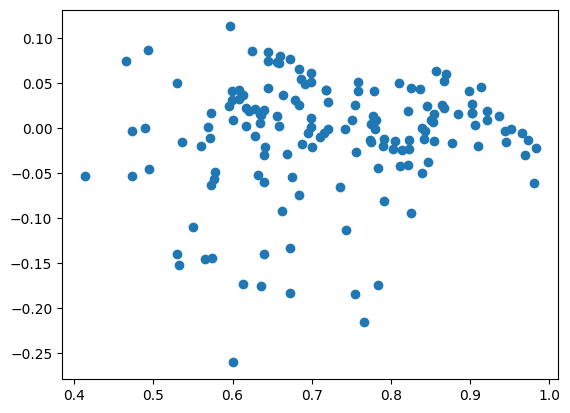

In [199]:
def train_models(X_train, y_train, X_test, y_test, cols, models):
    results = []
    for model_info in models:
        model_name = model_info[0]
        model_class = model_info[1]
        alpha = None
        if len(model_info) > 2:
            alpha = model_info[2]
        
        model = model_class(alpha=alpha) if alpha is not None else model_class()
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        p = X_train.shape[1]
        train_res = get_metrics(y_train, y_pred_train, p)
        test_res = get_metrics(y_test, y_pred_test, p)
        
        return model
    
models = [
    ("linear", LinearRegression),
    ("ridge", Ridge, 1.0),
    ("lasso", Lasso, 0.001)
]

results = train_models(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], models)    
y_pred = results.predict(X_test)
residuals = (y_test - y_pred)
sns.histplot(residuals)
plt.show()

stats.probplot(residuals, plot=plt)
plt.show()


#### Test for Homoscedasticity
plt.scatter(y_pred, residuals)
plt.show()


No Homoscedasticity

Only two features that is CGPA and Research is enough to prredict the Chances of admit